In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Milwaukee_county_records - milwaukee_county_records.csv - actual drug deaths.csv')

In [3]:
data.head()

,CaseIdentifier,CaseNum,CaseNum_STR,CaseNumInt,CaseType,EventDate,DeathDate,Age,Sex,Race,...,DeathZip,DeathState,ESRI_OID,death_day,death_month,death_month_num,death_year,death_day_of_week,death_day_is_weekend,death_day_week_of_year
0,208895,16-04779,16-04779,1604779,Exam,2016-09-21,2016-09-22 22:45:00,28 Years,Male,White,...,53212.0,WI,38035,22.0,September,9.0,2016.0,Thursday,False,38.0
1,208896,09-00198,09-00198,900198,Body Released,NaN,2009-01-14 19:25:00,81 Years,Female,White,...,53220.0,WI,19110,14.0,January,1.0,2009.0,Wednesday,False,3.0
2,208897,23-03215,23-03215,2303215,Body Released,NaN,2023-05-12 20:14:00,31 Years,Male,Black,...,53217.0,WI,61702,12.0,May,5.0,2023.0,Friday,False,19.0
3,208898,24-06212,24-06212,2406212,Body Released,NaN,2024-09-18 9:49:00,93 Years,Male,White,...,53228.0,WI,65914,18.0,September,9.0,2024.0,Wednesday,False,38.0
4,208899,06-00832,06-00832,600832,Body Released,NaN,2006-02-28 2:45:00,74 Years,Male,White,...,53219.0,WI,11602,28.0,February,2.0,2006.0,Tuesday,False,9.0


In [4]:
data.shape

(68476, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68476 entries, 0 to 68475
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CaseIdentifier          68476 non-null  int64  
 1   CaseNum                 68476 non-null  object 
 2   CaseNum_STR             68476 non-null  object 
 3   CaseNumInt              68476 non-null  int64  
 4   CaseType                68476 non-null  object 
 5   EventDate               22316 non-null  object 
 6   DeathDate               68416 non-null  object 
 7   Age                     67998 non-null  object 
 8   Sex                     68414 non-null  object 
 9   Race                    68324 non-null  object 
 10  Mode                    68179 non-null  object 
 11  CauseA                  49519 non-null  object 
 12  CauseB                  9428 non-null   object 
 13  CauseOther              22871 non-null  object 
 14  XCoordinate             68476 non-null

In [6]:
data.isnull().sum()

CaseIdentifier                0
CaseNum                       0
CaseNum_STR                   0
CaseNumInt                    0
CaseType                      0
EventDate                 46160
DeathDate                    60
Age                         478
Sex                          62
Race                        152
Mode                        297
CauseA                    18957
CauseB                    59048
CauseOther                45605
XCoordinate                   0
YCoordinate                   0
DeathType                 44609
DeathSubType              62097
DeathAddr                   136
DeathCity                   750
DeathZip                   3168
DeathState                  328
ESRI_OID                      0
death_day                    60
death_month                  60
death_month_num              60
death_year                   60
death_day_of_week            60
death_day_is_weekend          0
death_day_week_of_year       60
dtype: int64

In [7]:
amount_per_cause_of_death = data['Mode'].groupby(data['Mode']).count().reset_index(name = '# per')
amount_per_cause_of_death = amount_per_cause_of_death.sort_values(by='# per', ascending = False)
print(amount_per_cause_of_death)

             Mode  # per
2         Natural  43765
0        Accident  16580
1        Homicide   3824
4         Suicide   2855
5    Undetermined   1153
3  Not Applicable      2


<Axes: xlabel='Mode'>

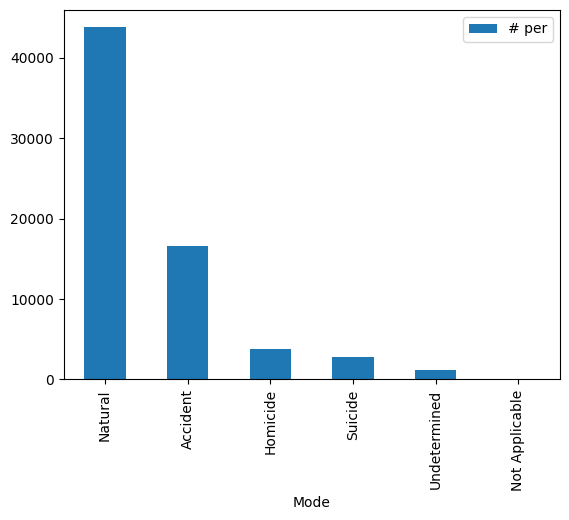

In [8]:
import matplotlib as plt
firstPlot = pd.DataFrame(amount_per_cause_of_death)
firstPlot.plot.bar(x='Mode', y = '# per')